Import Python Libraries

In [6]:
# =====================================================================
# Title             : Intro_AI_Project.py
# Description       : This program uses Scikit-learn machine learning algorithms in a virtual environment to predict titanic survival on a dataset.
# Author            : Christian Tran (R11641653)
# Date              : 4/1/2024
# Notes             : This program requires compatibility for Python with scikit-learn
# =====================================================================

#Import the needed libraries and packages
import pandas as pd
from sklearn import preprocessing
from sklearn import tree

#Added numpy
import numpy

#Adding additional sklearn machine learning algorithms:
#Libraries for graphing 
import seaborn as sns 
import matplotlib.pyplot as plt

#Sklearn machine learning models (2 ML models)
from sklearn.ensemble import RandomForestClassifier #Random forest classifier ML algorithm
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.linear_model import LogisticRegression

#Sklearn data manipulation and calculation packages
from sklearn.metrics import confusion_matrix, classification_report

#Added this line to fix the formatting for graphs in jupyter notebook
%matplotlib inline


Preprocess the Data, Clean the Data

In [7]:
# Load training data

train_df = pd.read_csv('train.csv')

print ('-- Training data')
print (train_df.head(10))
print (train_df.dtypes)
print ('')

# Data cleansing

mean_age = train_df['Age'].mean()

train_df['Age'] = train_df['Age'].fillna(mean_age)

print ('-- After data cleansing')
print (train_df.head(10))
print ('')

# Prepare the label

labels = train_df['Survived']

# Prepare the features

sex_encoder = preprocessing.LabelBinarizer()
sex_encoder = sex_encoder.fit(train_df['Sex'])
train_df['Sex_encoded'] = sex_encoder.transform(train_df['Sex'])

features = train_df[['Age', 'Sex_encoded', 'Pclass']]

-- Training data
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timo

Decision Tree Classifier Train and Test

-- Model
DecisionTreeClassifier(max_depth=3, random_state=42)

-- Test data after data cleansing
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch 

[Text(0.5, 1.0, 'Predicted Survival for Each Passenger: Decision Tree Classifier')]

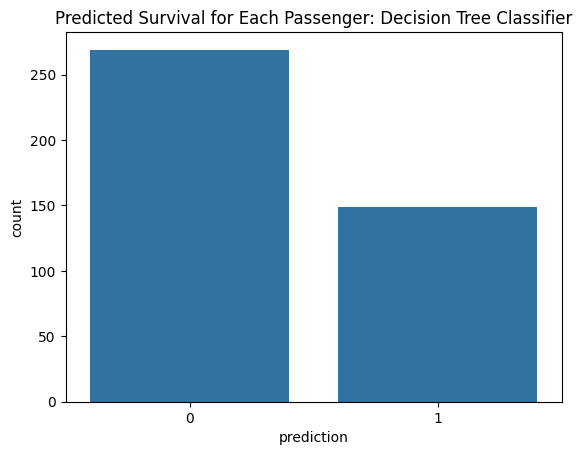

In [8]:
# Train the model
dt = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42) #Decision tree classifier
model = dt.fit(features, labels)

print ('-- Model')
print (model)
print ('')

# Load test data + data cleansing

test_df = pd.read_csv('test.csv')

test_df['Age'] = test_df['Age'].fillna(mean_age)

print ('-- Test data after data cleansing')
print (test_df.head(10))
print ('')


# Make predictions

test_df['Sex_encoded'] = sex_encoder.transform(test_df['Sex'])

test_features = test_df[['Age', 'Sex_encoded', 'Pclass']]

test_df_results = model.predict(test_features)



test_df['prediction'] = test_df_results

print ('Test data with predictions')
print (test_df.head(10))
print ('')

#generate a graph that shows the predicted values from the previous model above:
#print out graph showcasing the predictions:
sns.barplot(test_df['prediction'].value_counts()).set(title = 'Predicted Survival for Each Passenger: Decision Tree Classifier')

Compare Decision Tree Predictions with Expected Results

In [9]:
# Compare predictions with expected results (raw)

expected_results_df = pd.read_csv('gender_submission.csv')

test_df['Survived'] = expected_results_df['Survived']

print ('-- Predictions (raw)')
print (test_df.head(10))
print ('')


# Compare predictions with expected results (aggregates)

true_negatives  = test_df.loc[lambda df: (df.Survived == 0) & (df.prediction == 0), :].shape[0]
true_postives   = test_df.loc[lambda df: (df.Survived == 1) & (df.prediction == 1), :].shape[0]
false_negatives = test_df.loc[lambda df: (df.Survived == 1) & (df.prediction == 0), :].shape[0]
false_postives  = test_df.loc[lambda df: (df.Survived == 0) & (df.prediction == 1), :].shape[0]

print ('-- Prediction (aggregates)')
print ('True negatives: '  + str(true_negatives))
print ('True positives: '  + str(true_postives))
print ('False negatives: ' + str(false_negatives))
print ('False positives: ' + str(false_postives))

#Check how well the model performed with classification report and confusion matrix
print(classification_report(test_df['Survived'], test_df_results)) #test_df represents the expected values I want to compare to our predicted values (rfc_predictions)
print(confusion_matrix(test_df['Survived'], test_df_results)) #confusion matrix shows how many correct and mislabeled survival rates 


-- Predictions (raw)
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  Sex_encoded  \
0  34.5      0      0    

Add-On Code for Project

Survived
0    549
1    342
Name: count, dtype: int64


[Text(0.5, 1.0, 'Training Data')]

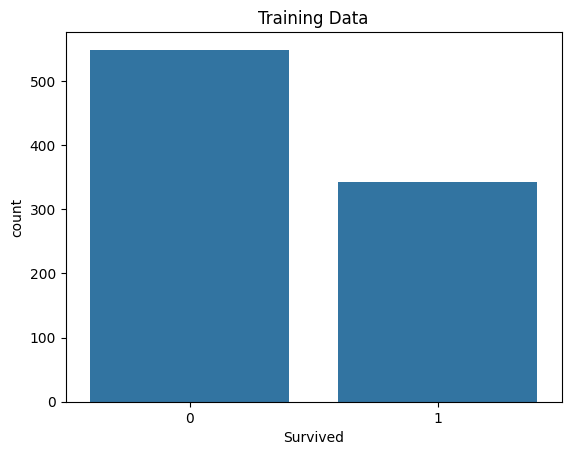

In [10]:
#Start of add-on-code for project: 
#   4/1/2024 - Christian Tran R11641653
#The plan:
#   - Add on at least 2 more predictive machine learning models on this python code 
#   - Add at least 3 (I think...) graphs
#   - Add on accuracy scores for each of the other predictive machine learning models 

#Uses seaborn library to make a basic bargraph on how many survived and how many died in the initial train.csv dataframe
print(train_df['Survived'].value_counts())
sns.barplot(train_df['Survived'].value_counts()).set(title = 'Training Data')

Logistic Regression

First 20 Predicted Survival: 
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       266
           1       0.94      0.95      0.94       152

    accuracy                           0.96       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.96      0.96      0.96       418

[[256  10]
 [  8 144]]
<class 'numpy.ndarray'>
Zero_count: 
264
One_count: 
154
DUMMY DATA PREDICTION: 
[0]


Text(0.5, 1.0, 'Predicted Survival for Each Passenger: Logistic Regression')

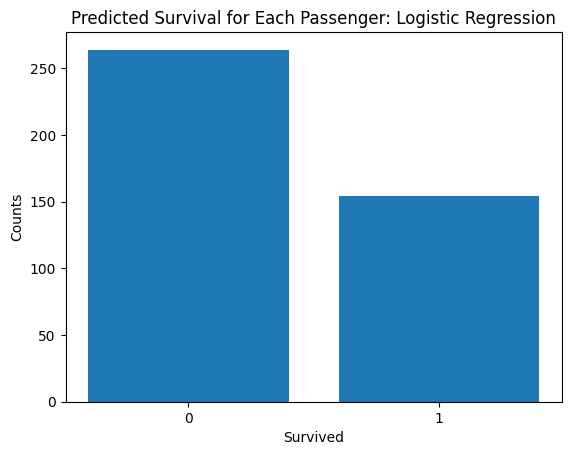

In [11]:
#Training the Logistic Regression model
#rfc = RandomForestClassifier(n_estimators = 140) #n_estimators denote how many decision trees to use for the model.
LR = LogisticRegression()
Logistic_regress = LR.fit(features, labels) #train the rfc model with features (the features to base predictions off of) and labels (the feature we want to predict)

#Predict survival for each passenger 
LR_predictions = LR.predict(test_features) #after training the model, make predictions on the test.csv file using the features from the test.csv file.

#display first 20 predictions from the random forest classifier model
print('First 20 Predicted Survival: ')
print(LR_predictions[:20])

#Check how well the model performed with classification report and confusion matrix
print(classification_report(test_df['Survived'], LR_predictions)) #test_df represents the expected values I want to compare to our predicted values (rfc_predictions)
print(confusion_matrix(test_df['Survived'], LR_predictions)) #confusion matrix shows how many correct and mislabeled survival rates 

print(type(LR_predictions))

#count number of 0's and 1's in rfc_predictions array for bargraph
zero_count = 0
one_count = 0

for values in LR_predictions:
    if (values  == 0):
        zero_count = zero_count + 1
    else:
        one_count = one_count + 1

print('Zero_count: ')
print(zero_count)
print('One_count: ')
print(one_count)

#Test if I can insert new data from code and see if the model will make a prediction:
dummy_data = [[934,2,'Christian Tran','male',23,0,0,612311,4.598,float('NaN'),'Q']]

dummy_df = pd.DataFrame(dummy_data, columns=['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])

dummy_df['Sex_encoded'] = sex_encoder.transform(dummy_df['Sex'])

dummy_features = dummy_df[['Age', 'Sex_encoded', 'Pclass']]

dummy_pred = LR.predict(dummy_features)
print('DUMMY DATA PREDICTION: ')
print(dummy_pred) 

#Create bargraph that shows the predicted 0's and 1's
#Get data ready for graph:
LR_pred_data = {'0': zero_count, '1': one_count}
LR_x_labels = list(LR_pred_data.keys())
LR_values = list(LR_pred_data.values())
#create a bargraph with matplotlib
plt.bar(LR_x_labels, LR_values)
plt.xlabel('Survived')
plt.ylabel('Counts')
plt.title('Predicted Survival for Each Passenger: Logistic Regression')

Graph to show Expected Survivals

[Text(0.5, 1.0, 'Expected Survival for Each Passenger')]

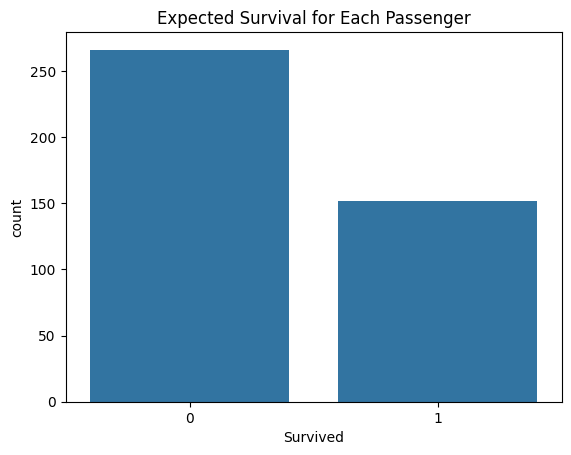

In [12]:
#Create a bargraph that shows the expected 0's and 1's
sns.barplot(test_df['Survived'].value_counts()).set(title = 'Expected Survival for Each Passenger')

### Support Vector Regression Model
 - rbf: radial basis kernal
 - gamma: defines how far the influence a training example reaches
 - C: regularization Parameter 

First 20 Predicted Survival: 
[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       266
           1       0.96      0.94      0.95       152

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418

[[260   6]
 [  9 143]]
<class 'numpy.ndarray'>
Zero_count: 
269
One_count: 
149
DUMMY DATA PREDICTION: 
[0]


Text(0.5, 1.0, 'Predicted Survival for Each Passenger: Support Vector Regression')

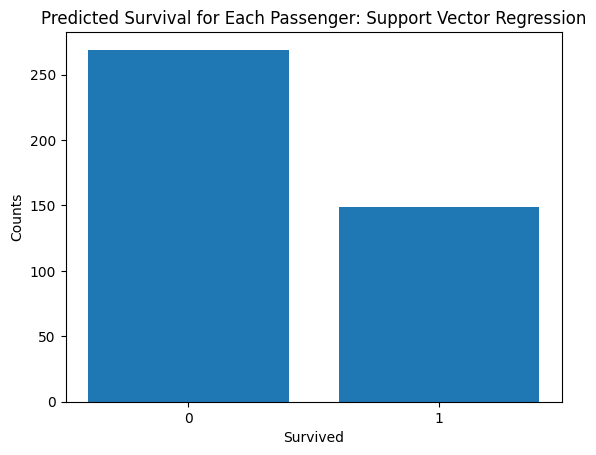

In [13]:
#Training the Support Vector Model using the radial basis kernel
supVectClass = SVC(kernel='rbf', C=5, gamma=0.01)

trained_SVC = supVectClass.fit(features, labels) #train the rfc model with features (the features to base predictions off of) and labels (the feature we want to predict)

#Predict survival for each passenger 
SVC_predictions = supVectClass.predict(test_features) #after training the model, make predictions on the test.csv file using the features from the test.csv file.

#display first 20 predictions from the random forest classifier model
print('First 20 Predicted Survival: ')
print(SVC_predictions[:20])

#Check how well the model performed with classification report and confusion matrix
print(classification_report(test_df['Survived'], SVC_predictions)) #test_df represents the expected values I want to compare to our predicted values (rfc_predictions)
print(confusion_matrix(test_df['Survived'], SVC_predictions)) #confusion matrix shows how many correct and mislabeled survival rates 

print(type(SVC_predictions))

#count number of 0's and 1's in rfc_predictions array for bargraph
zero_count = 0
one_count = 0

for values in SVC_predictions:
    if (values  == 0):
        zero_count = zero_count + 1
    else:
        one_count = one_count + 1

print('Zero_count: ')
print(zero_count)
print('One_count: ')
print(one_count)

#Test if I can insert new data from code and see if the model will make a prediction:
dummy_data = [[934,2,'Christian Tran','male',23,0,0,612311,4.598,float('NaN'),'Q']]

dummy_df = pd.DataFrame(dummy_data, columns=['PassengerId','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])

dummy_df['Sex_encoded'] = sex_encoder.transform(dummy_df['Sex'])

dummy_features = dummy_df[['Age', 'Sex_encoded', 'Pclass']]

dummy_pred = supVectClass.predict(dummy_features)
print('DUMMY DATA PREDICTION: ')
print(dummy_pred) 

#Create bargraph that shows the predicted 0's and 1's
#Get data ready for graph:
LR_pred_data = {'0': zero_count, '1': one_count}
LR_x_labels = list(LR_pred_data.keys())
LR_values = list(LR_pred_data.values())
#create a bargraph with matplotlib
plt.bar(LR_x_labels, LR_values)
plt.xlabel('Survived')
plt.ylabel('Counts')
plt.title('Predicted Survival for Each Passenger: Support Vector Regression')